In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Loading data function for function2
def load_data():
    A = np.loadtxt("data/fun2_A.txt").reshape((500, 100))
    b = np.loadtxt("data/fun2_b.txt").reshape(-1, 1)
    c = np.loadtxt("data/fun2_c.txt").reshape(-1, 1)
    return A, b, c


# Initialize coefficient and start point
A, b, c = load_data()
x0_f1 = np.random.rand(100)
x0_f2 = np.abs(np.random.rand(100))
x0_f3 = np.array([0.0, 0.0])

In [10]:
# Define function1
def function1(x):
    return np.sum(np.arange(1, len(x) + 1) * x**2)


def grad_function1(x):
    return 2 * np.arange(1, len(x) + 1) * x

In [11]:
# Define function2
def function2(x, A, b, c):
    Ax = A @ x
    return c.T @ x - np.sum(np.log(np.clip(b.flatten() - Ax, 1e-8, None)))


def grad_function2(x, A, b, c):
    Ax = A @ x
    term = 1 / (b.flatten() - Ax)
    return c.flatten() + A.T @ term


def hessian_function2(x, A, b):
    Ax = A @ x
    D = np.diagflat(1 / np.clip((b.flatten() - Ax) ** 2, 1e-10, None))
    H = A.T @ D @ A
    H += 1e-6 * np.eye(H.shape[0])
    return H

In [12]:
# Define function3
def function3(x):
    return 100 * (x[1] - x[0] ** 2) ** 2 + (1 - x[0]) ** 2


def grad_function3(x):
    return np.array(
        [-400 * x[0] * (x[1] - x[0] ** 2) - 2 * (1 - x[0]), 200 * (x[1] - x[0] ** 2)]
    )


def hessian_function3(x):
    return np.array(
        [[1200 * x[0] ** 2 - 400 * x[1] + 2, -400 * x[0]], [-400 * x[0], 200]]
    )

In [13]:
# Optimization method 1: GD
def gradient_descent(func, grad_func, x0, alpha=0.001, tol=1e-6, max_iter=200):
    x = x0
    history = []
    for i in range(max_iter):
        grad = grad_func(x)
        history.append(func(x))
        x = x - alpha * grad
        if np.linalg.norm(grad) < tol:
            break
    return x, history

In [14]:
def line_search_newton(func, x, p, grad, alpha=1.0, c1=1e-4, rho=0.9):
    while func(x + alpha * p) > func(x) + c1 * alpha * np.dot(grad, p):
        alpha *= rho
    return alpha


# Optimization method 2: Newton
def newton_method(func, grad_func, hess_func, x0, tol=1e-6, max_iter=200):
    x = x0
    history = []
    for i in range(max_iter):
        grad = grad_func(x)
        hess = hess_func(x)
        history.append(func(x))
        try:
            p = -np.linalg.solve(hess, grad)
        except np.linalg.LinAlgError:
            print(f"Iteration {i}: Stopping because Hessian is singular.")
            break
        alpha = line_search_newton(func, x, p, grad)
        x = x + alpha * p
        if np.linalg.norm(grad) < tol:
            break
    return x, history

Function1 Results:
Gradient Descent: [2.95528073e-01 3.04730285e-01 8.92337181e-02 1.35623125e-01
 2.90173661e-02 7.96241767e-02 2.14114502e-02 2.97398383e-02
 2.24273236e-02 9.84603543e-03 8.38385755e-03 7.23470176e-03
 4.05753718e-03 3.24212368e-04 7.09730477e-04 2.55609237e-04
 6.91196506e-04 5.96918758e-04 1.48786475e-06 1.91857602e-04
 1.25653445e-04 1.22452411e-04 6.80469059e-05 1.85971519e-05
 8.58573058e-06 1.02915192e-05 1.06934295e-05 3.64462574e-06
 4.30588808e-06 2.13408637e-06 1.92171586e-06 4.92630409e-07
 9.31284017e-07 2.05827373e-07 3.00818380e-07 2.82406110e-07
 2.49431528e-08 9.51944053e-08 1.18901085e-08 1.98173413e-08
 2.12308498e-08 1.07780610e-08 1.21332850e-08 7.68237852e-09
 2.16574513e-09 7.11077610e-10 1.53562995e-09 9.48205576e-10
 9.22615624e-10 4.68462500e-10 2.16391123e-11 1.50526209e-10
 3.36596999e-11 1.06885911e-10 2.44556025e-11 3.11336415e-11
 9.59173540e-12 1.05718207e-11 1.00162800e-13 6.81334495e-12
 4.44741390e-13 8.80389201e-13 2.08027045e-13 6.

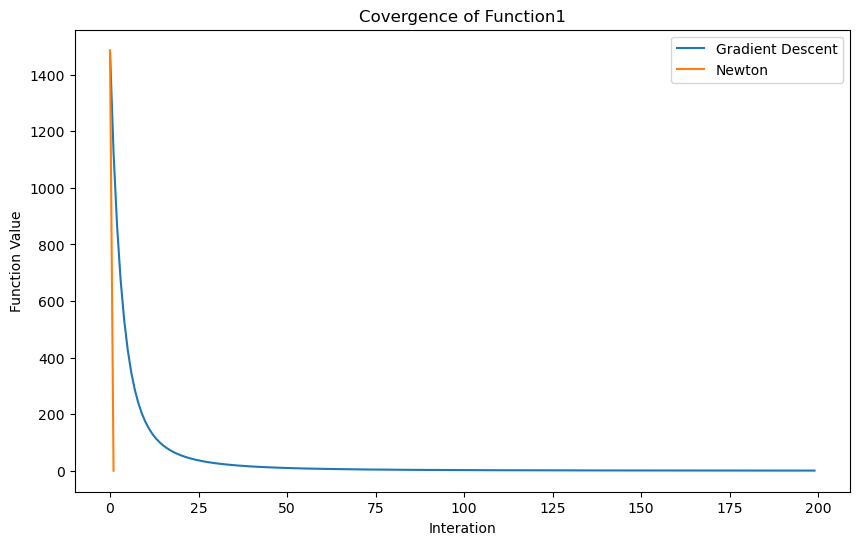

In [15]:
# ----- Function1 -----
max_iteration = 100
gd_result_f1, gd_history_f1 = gradient_descent(
    function1, grad_function1, x0_f1, max_iter=max_iteration
)
newton_result_f1, newton_history_f1 = newton_method(
    function1,
    grad_function1,
    lambda x: 2 * np.diag(np.arange(1, len(x) + 1)),
    x0_f1,
    max_iter=max_iteration,
)
print("Function1 Results:")
print("Gradient Descent:", gd_result_f1)
print("Newton:", newton_result_f1)

# Plot for function1
plt.figure(figsize=(10, 6))
plt.plot(gd_history_f1, label="Gradient Descent")
plt.plot(newton_history_f1, label="Newton")
plt.xlabel("Interation")
plt.ylabel("Function Value")
plt.title("Covergence of Function1")
plt.legend()
plt.show()